In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

excel_yolu = 'Verilerim.xlsx'
df = pd.read_excel(excel_yolu)

In [2]:
# İndeks değerlerini çıkardım.
df.drop('Unnamed: 0', axis=1, inplace=True)
df.set_index('İsim', inplace=True)

In [3]:
#Ekran çözünürlüğünü iki ayrı sütuna böldüm.
df[['Genislik', 'Uzunluk']] = df['Ekran Piksel'].str.split('x', expand=True)
df.drop(columns=["Ekran Piksel"],inplace=True)

In [4]:
df

,Fiyat,Puan,Depolama,Hat Sayısı,RAM,Ekran Boyutu,Batarya Kapasitesi,5 G,4.5 G,Suya Dayanıklılık,Kamera Piksel,Ekran/Gövde Oranı,CPU Frekans,CPU Cekirdek,SAR Degeri,Parmak İzi,Hızlı Şarj,Genislik,Uzunluk
İsim,,,,,,,,,,,,,,,,,,,
Apple iPhone 15 Pro Max,96229.0,100,1,Çift Hat,8.0,6.70,4422,Var,Var,Var,48.0,89.10,3.64,6,0.980,Yok,Var,1290,2796
Samsung Galaxy S23 Ultra,63048.0,99,1,Çift Hat,12.0,6.80,5000,Var,Var,Var,200.0,89.41,3.36,8,0.963,Var,Var,1440,3088
Apple iPhone 15 Pro,82499.0,97,1,Çift Hat,8.0,6.10,3274,Var,Var,Var,48.0,87.35,3.64,6,0.980,Yok,Var,1179,2556
Xiaomi 13 Pro,NaN,97,512,Çift Hat,12.0,6.73,4820,Var,Var,Var,50.0,89.74,3.20,8,0.998,Var,Var,1440,3200
Apple iPhone 14 Pro Max,80881.6,95,1,Çift Hat,6.0,6.70,4323,Var,Var,Var,48.0,87.63,3.46,6,0.990,Yok,Var,1290,2796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samsung Galaxy J3,NaN,21,16,Çift Hat,2.0,5.00,2400,Yok,Var,Yok,13.0,68.46,1.40,4,0.658,Yok,Yok,720,1280
Samsung Galaxy On5,NaN,21,16,Çift Hat,2.0,5.00,2600,Yok,Var,Yok,13.0,69.44,1.40,4,NaN,Var,Yok,720,1280
LG G4 Beat,NaN,21,8,Tek Hat,1.5,5.20,2300,Yok,Var,Yok,8.0,71.95,1.50,8,0.507,Yok,Yok,1080,1920


In [5]:
#Hangi sütunların sayısal veri içermediğini tespit ettim.
for column in df.columns:
    try:
        df[column] = pd.to_numeric(df[column])
        print(f"{column} sütunu sayısal veri içeriyor.")
    except ValueError:
        print(f"{column} sütunu sayısal veri içermiyor.")


Fiyat sütunu sayısal veri içeriyor.
Puan sütunu sayısal veri içeriyor.
Depolama sütunu sayısal veri içeriyor.
Hat Sayısı sütunu sayısal veri içermiyor.
RAM sütunu sayısal veri içeriyor.
Ekran Boyutu sütunu sayısal veri içeriyor.
Batarya Kapasitesi sütunu sayısal veri içeriyor.
5 G sütunu sayısal veri içermiyor.
4.5 G sütunu sayısal veri içermiyor.
Suya Dayanıklılık sütunu sayısal veri içermiyor.
Kamera Piksel sütunu sayısal veri içeriyor.
Ekran/Gövde Oranı sütunu sayısal veri içeriyor.
CPU Frekans sütunu sayısal veri içeriyor.
CPU Cekirdek sütunu sayısal veri içeriyor.
SAR Degeri sütunu sayısal veri içeriyor.
Parmak İzi sütunu sayısal veri içermiyor.
Hızlı Şarj sütunu sayısal veri içermiyor.
Genislik sütunu sayısal veri içeriyor.
Uzunluk sütunu sayısal veri içermiyor.


In [6]:
print(df['Uzunluk'].value_counts())
#Uzunluk değerindeki verileri sayısal verilere çevirdim.
df['Uzunluk'] = pd.to_numeric(df['Uzunluk'], errors='coerce')

Uzunluk
1920               341
2400               200
1280               153
2340               128
1600               104
                  ... 
2664                 1
2550                 1
2616                 1
2504                 1
1200(SD) Piksel      1
Name: count, Length: 67, dtype: int64


In [7]:
print(df['Hat Sayısı'].value_counts())
df.dropna(subset=['Hat Sayısı'], inplace=True)
print(df['Hat Sayısı'].value_counts())
#None olan değerleri eledim

Hat Sayısı
Çift Hat    1053
Tek Hat      425
Name: count, dtype: int64
Hat Sayısı
Çift Hat    1053
Tek Hat      425
Name: count, dtype: int64


In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

sutun_adı = 'Parmak İzi'
df['Parmak izi Okuyucu'] = label_encoder.fit_transform(df[sutun_adı])

print(df[['Parmak İzi', 'Parmak izi Okuyucu']])
df.drop(columns=["Parmak İzi"],inplace=True)

                            Parmak İzi  Parmak izi Okuyucu
İsim                                                      
Apple iPhone 15 Pro Max            Yok                   1
Samsung Galaxy S23 Ultra           Var                   0
Apple iPhone 15 Pro                Yok                   1
Xiaomi 13 Pro                      Var                   0
Apple iPhone 14 Pro Max            Yok                   1
...                                ...                 ...
Samsung Galaxy J3                  Yok                   1
Samsung Galaxy On5                 Var                   0
LG G4 Beat                         Yok                   1
Microsoft Lumia 640 XL LTE         Yok                   1
Lenovo A7000 Turbo                 Yok                   1

[1478 rows x 2 columns]


In [9]:
label_encoder = LabelEncoder()

sutun_adı = '5 G'
df['5G'] = label_encoder.fit_transform(df[sutun_adı])

print(df[['5 G', '5G']])
df.drop(columns=["5 G"],inplace=True)

                             5 G  5G
İsim                                
Apple iPhone 15 Pro Max      Var   0
Samsung Galaxy S23 Ultra     Var   0
Apple iPhone 15 Pro          Var   0
Xiaomi 13 Pro                Var   0
Apple iPhone 14 Pro Max      Var   0
...                          ...  ..
Samsung Galaxy J3            Yok   1
Samsung Galaxy On5           Yok   1
LG G4 Beat                   Yok   1
Microsoft Lumia 640 XL LTE   Yok   1
Lenovo A7000 Turbo           Yok   1

[1478 rows x 2 columns]


In [10]:
label_encoder = LabelEncoder()

sutun_adı = '4.5 G'
df['4.5G'] = label_encoder.fit_transform(df[sutun_adı])

print(df[['4.5 G', '4.5G']])
df.drop(columns=["4.5 G"],inplace=True)

                            4.5 G  4.5G
İsim                                   
Apple iPhone 15 Pro Max       Var     0
Samsung Galaxy S23 Ultra      Var     0
Apple iPhone 15 Pro           Var     0
Xiaomi 13 Pro                 Var     0
Apple iPhone 14 Pro Max       Var     0
...                           ...   ...
Samsung Galaxy J3             Var     0
Samsung Galaxy On5            Var     0
LG G4 Beat                    Var     0
Microsoft Lumia 640 XL LTE    Var     0
Lenovo A7000 Turbo            Var     0

[1478 rows x 2 columns]


In [11]:
label_encoder = LabelEncoder()

sutun_adı = 'Suya Dayanıklılık'
df['Suya Dayaniklilik'] = label_encoder.fit_transform(df[sutun_adı])

print(df[['Suya Dayanıklılık', 'Suya Dayaniklilik']])
df.drop(columns=["Suya Dayanıklılık"],inplace=True)

                            Suya Dayanıklılık  Suya Dayaniklilik
İsim                                                            
Apple iPhone 15 Pro Max                   Var                  0
Samsung Galaxy S23 Ultra                  Var                  0
Apple iPhone 15 Pro                       Var                  0
Xiaomi 13 Pro                             Var                  0
Apple iPhone 14 Pro Max                   Var                  0
...                                       ...                ...
Samsung Galaxy J3                         Yok                  1
Samsung Galaxy On5                        Yok                  1
LG G4 Beat                                Yok                  1
Microsoft Lumia 640 XL LTE                Yok                  1
Lenovo A7000 Turbo                        Yok                  1

[1478 rows x 2 columns]


In [12]:
dflabel_encoder = LabelEncoder()

sutun_adı = 'Hızlı Şarj'
df['Hizli Şarj'] = label_encoder.fit_transform(df[sutun_adı])

print(df[['Hızlı Şarj', 'Hizli Şarj']])
df.drop(columns=["Hızlı Şarj"],inplace=True)

                            Hızlı Şarj  Hizli Şarj
İsim                                              
Apple iPhone 15 Pro Max            Var           0
Samsung Galaxy S23 Ultra           Var           0
Apple iPhone 15 Pro                Var           0
Xiaomi 13 Pro                      Var           0
Apple iPhone 14 Pro Max            Var           0
...                                ...         ...
Samsung Galaxy J3                  Yok           1
Samsung Galaxy On5                 Yok           1
LG G4 Beat                         Yok           1
Microsoft Lumia 640 XL LTE         Yok           1
Lenovo A7000 Turbo                 Yok           1

[1478 rows x 2 columns]


In [13]:
dfdflabel_encoder = LabelEncoder()

sutun_adı = 'Hat Sayısı'
df['Hat Sayisi'] = label_encoder.fit_transform(df[sutun_adı])

print(df[['Hat Sayısı', 'Hat Sayisi']])
df.drop(columns=["Hat Sayısı"],inplace=True)

                            Hat Sayısı  Hat Sayisi
İsim                                              
Apple iPhone 15 Pro Max       Çift Hat           1
Samsung Galaxy S23 Ultra      Çift Hat           1
Apple iPhone 15 Pro           Çift Hat           1
Xiaomi 13 Pro                 Çift Hat           1
Apple iPhone 14 Pro Max       Çift Hat           1
...                                ...         ...
Samsung Galaxy J3             Çift Hat           1
Samsung Galaxy On5            Çift Hat           1
LG G4 Beat                     Tek Hat           0
Microsoft Lumia 640 XL LTE     Tek Hat           0
Lenovo A7000 Turbo            Çift Hat           1

[1478 rows x 2 columns]


In [14]:
df

,Fiyat,Puan,Depolama,RAM,Ekran Boyutu,Batarya Kapasitesi,Kamera Piksel,Ekran/Gövde Oranı,CPU Frekans,CPU Cekirdek,SAR Degeri,Genislik,Uzunluk,Parmak izi Okuyucu,5G,4.5G,Suya Dayaniklilik,Hizli Şarj,Hat Sayisi
İsim,,,,,,,,,,,,,,,,,,,
Apple iPhone 15 Pro Max,96229.0,100,1,8.0,6.70,4422,48.0,89.10,3.64,6,0.980,1290,2796.0,1,0,0,0,0,1
Samsung Galaxy S23 Ultra,63048.0,99,1,12.0,6.80,5000,200.0,89.41,3.36,8,0.963,1440,3088.0,0,0,0,0,0,1
Apple iPhone 15 Pro,82499.0,97,1,8.0,6.10,3274,48.0,87.35,3.64,6,0.980,1179,2556.0,1,0,0,0,0,1
Xiaomi 13 Pro,NaN,97,512,12.0,6.73,4820,50.0,89.74,3.20,8,0.998,1440,3200.0,0,0,0,0,0,1
Apple iPhone 14 Pro Max,80881.6,95,1,6.0,6.70,4323,48.0,87.63,3.46,6,0.990,1290,2796.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samsung Galaxy J3,NaN,21,16,2.0,5.00,2400,13.0,68.46,1.40,4,0.658,720,1280.0,1,1,0,1,1,1
Samsung Galaxy On5,NaN,21,16,2.0,5.00,2600,13.0,69.44,1.40,4,NaN,720,1280.0,0,1,0,1,1,1
LG G4 Beat,NaN,21,8,1.5,5.20,2300,8.0,71.95,1.50,8,0.507,1080,1920.0,1,1,0,1,1,0


In [15]:
for column in df.columns:
    try:
        df[column] = pd.to_numeric(df[column])
        print(f"{column} sütunu sayısal veri içeriyor.")
    except ValueError:
        print(f"{column} sütunu sayısal veri içermiyor.")


Fiyat sütunu sayısal veri içeriyor.
Puan sütunu sayısal veri içeriyor.
Depolama sütunu sayısal veri içeriyor.
RAM sütunu sayısal veri içeriyor.
Ekran Boyutu sütunu sayısal veri içeriyor.
Batarya Kapasitesi sütunu sayısal veri içeriyor.
Kamera Piksel sütunu sayısal veri içeriyor.
Ekran/Gövde Oranı sütunu sayısal veri içeriyor.
CPU Frekans sütunu sayısal veri içeriyor.
CPU Cekirdek sütunu sayısal veri içeriyor.
SAR Degeri sütunu sayısal veri içeriyor.
Genislik sütunu sayısal veri içeriyor.
Uzunluk sütunu sayısal veri içeriyor.
Parmak izi Okuyucu sütunu sayısal veri içeriyor.
5G sütunu sayısal veri içeriyor.
4.5G sütunu sayısal veri içeriyor.
Suya Dayaniklilik sütunu sayısal veri içeriyor.
Hizli Şarj sütunu sayısal veri içeriyor.
Hat Sayisi sütunu sayısal veri içeriyor.


In [16]:
# Bazı modeller 1TB idi bende GB veri değerine çevirdim.
df['Depolama'] = df['Depolama'].apply(lambda x: x * 1024 if x == 1 else x)

In [17]:
#Fiyat sütununda çok fazla boş değer vardı o yüzden tüm sütunu sildim
df.drop('Fiyat', axis=1, inplace=True)

In [18]:
#İndeks isimlerini sıfırlamak istedim.
df = df.reset_index(drop=True)

In [19]:
#Boş olan satırlardaki verileri hangi sütuna ait ise o sütunun ortalamasını alıp doldurdum.
df.fillna(df.mean(), inplace=True)
df

,Puan,Depolama,RAM,Ekran Boyutu,Batarya Kapasitesi,Kamera Piksel,Ekran/Gövde Oranı,CPU Frekans,CPU Cekirdek,SAR Degeri,Genislik,Uzunluk,Parmak izi Okuyucu,5G,4.5G,Suya Dayaniklilik,Hizli Şarj,Hat Sayisi
0,100,1024,8.0,6.70,4422,48.0,89.10,3.64,6,0.980000,1290,2796.0,1,0,0,0,0,1
1,99,1024,12.0,6.80,5000,200.0,89.41,3.36,8,0.963000,1440,3088.0,0,0,0,0,0,1
2,97,1024,8.0,6.10,3274,48.0,87.35,3.64,6,0.980000,1179,2556.0,1,0,0,0,0,1
3,97,512,12.0,6.73,4820,50.0,89.74,3.20,8,0.998000,1440,3200.0,0,0,0,0,0,1
4,95,1024,6.0,6.70,4323,48.0,87.63,3.46,6,0.990000,1290,2796.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1473,21,16,2.0,5.00,2400,13.0,68.46,1.40,4,0.658000,720,1280.0,1,1,0,1,1,1
1474,21,16,2.0,5.00,2600,13.0,69.44,1.40,4,0.702954,720,1280.0,0,1,0,1,1,1
1475,21,8,1.5,5.20,2300,8.0,71.95,1.50,8,0.507000,1080,1920.0,1,1,0,1,1,0
1476,21,8,1.0,5.70,3000,13.0,69.60,1.20,4,0.702954,720,1280.0,1,1,0,1,1,0


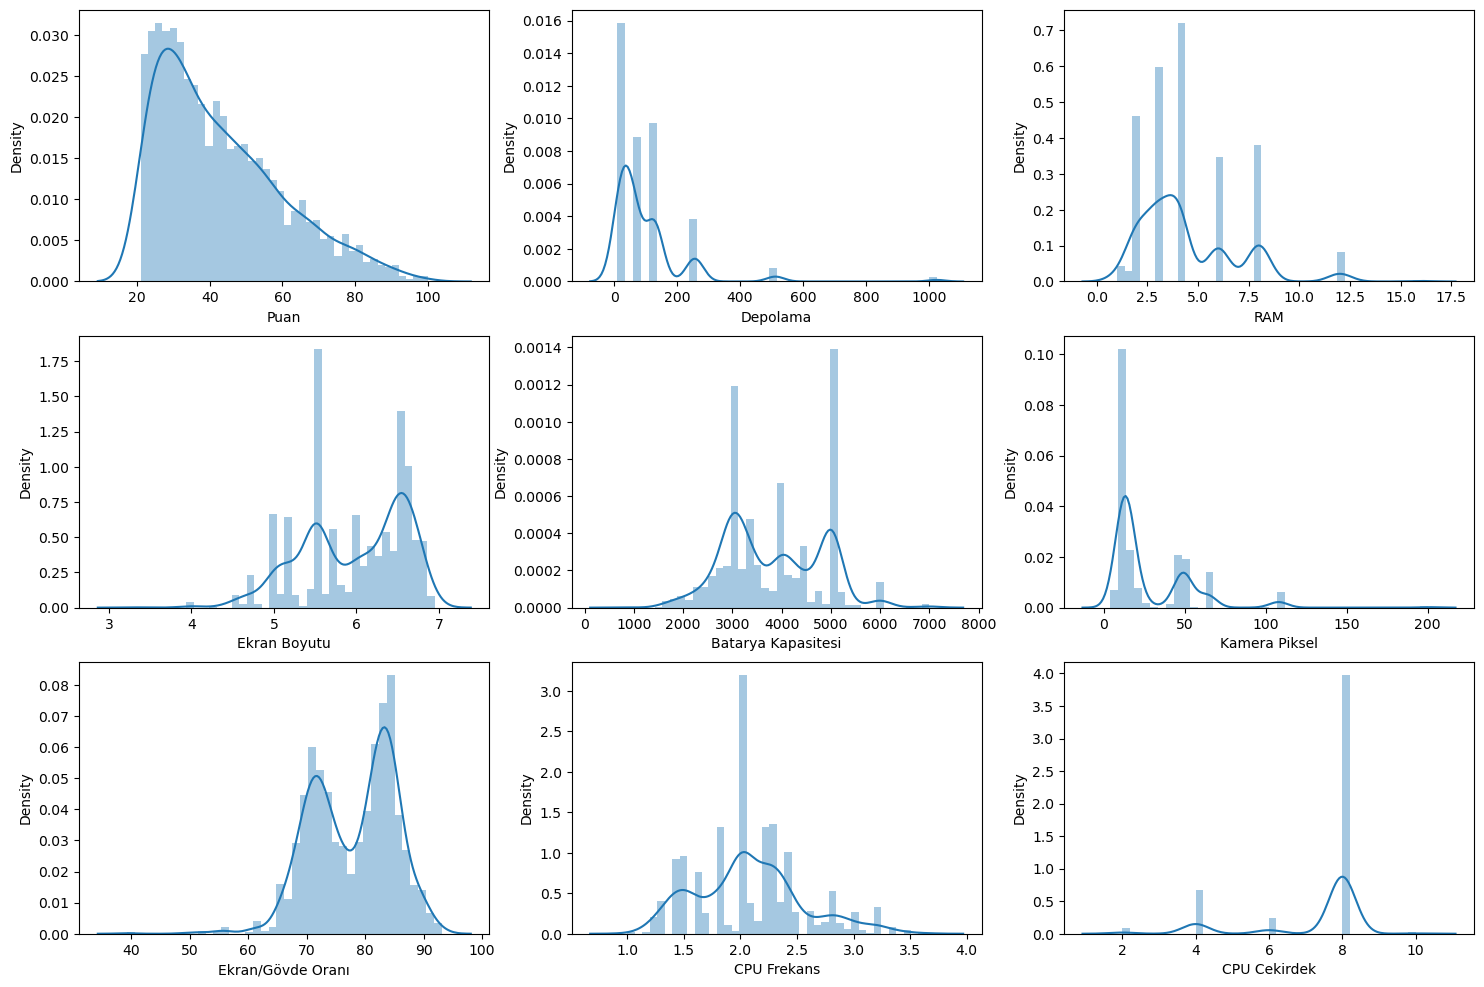

In [20]:
def distplot(nrows, ncols, columns):

    rows=nrows
    cols=ncols

    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(18, 12))

    columns = columns
    index=0

    for i in range(rows):
        for j in range(cols):
            sns.distplot(df[columns[index]], ax=ax[i][j], bins=40)
            index+=1
distplot(3, 3, df.columns)

<Axes: >

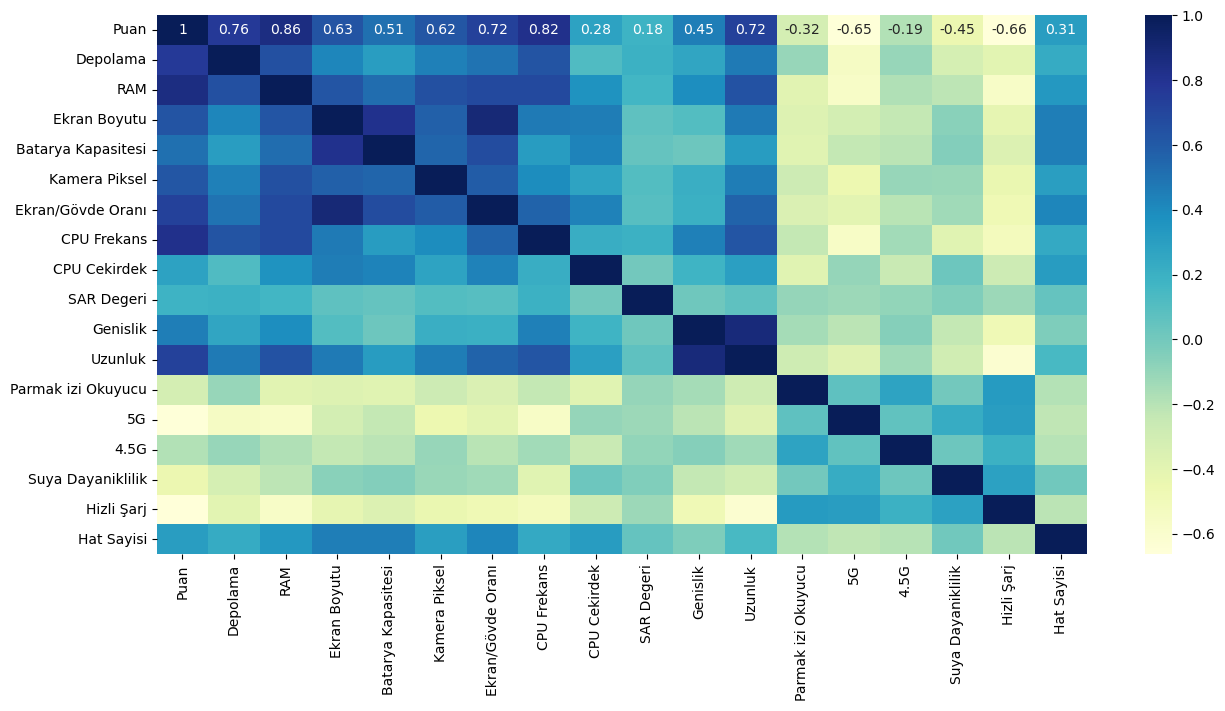

In [21]:
plt.figure(figsize=(15,7))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")

In [22]:
#Puan kısmına göre korelasyon matrisi oluşturdum.
corr_matrix['Puan'].sort_values(ascending=False)

Puan                  1.000000
RAM                   0.856493
CPU Frekans           0.822473
Depolama              0.764487
Uzunluk               0.724714
Ekran/Gövde Oranı     0.723989
Ekran Boyutu          0.633642
Kamera Piksel         0.621685
Batarya Kapasitesi    0.507366
Genislik              0.449223
Hat Sayisi            0.310492
CPU Cekirdek          0.282518
SAR Degeri            0.184404
4.5G                 -0.185049
Parmak izi Okuyucu   -0.317536
Suya Dayaniklilik    -0.446094
5G                   -0.651258
Hizli Şarj           -0.663691
Name: Puan, dtype: float64

In [23]:
#Korelasyon matrisindeki değerlere göre bazı kolonları eledim.
cikartilabilir = ['Hat Sayisi', 'CPU Cekirdek', 'SAR Degeri', '4.5G', 'Parmak izi Okuyucu',]
df.drop(cikartilabilir, axis=1, inplace=True)

In [24]:
df

,Puan,Depolama,RAM,Ekran Boyutu,Batarya Kapasitesi,Kamera Piksel,Ekran/Gövde Oranı,CPU Frekans,Genislik,Uzunluk,5G,Suya Dayaniklilik,Hizli Şarj
0,100,1024,8.0,6.70,4422,48.0,89.10,3.64,1290,2796.0,0,0,0
1,99,1024,12.0,6.80,5000,200.0,89.41,3.36,1440,3088.0,0,0,0
2,97,1024,8.0,6.10,3274,48.0,87.35,3.64,1179,2556.0,0,0,0
3,97,512,12.0,6.73,4820,50.0,89.74,3.20,1440,3200.0,0,0,0
4,95,1024,6.0,6.70,4323,48.0,87.63,3.46,1290,2796.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1473,21,16,2.0,5.00,2400,13.0,68.46,1.40,720,1280.0,1,1,1
1474,21,16,2.0,5.00,2600,13.0,69.44,1.40,720,1280.0,1,1,1
1475,21,8,1.5,5.20,2300,8.0,71.95,1.50,1080,1920.0,1,1,1
1476,21,8,1.0,5.70,3000,13.0,69.60,1.20,720,1280.0,1,1,1


# TRAİN - TEST

In [25]:
from sklearn.model_selection import learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso

In [26]:
from sklearn.model_selection import train_test_split
X = df.drop(['Puan'], axis=1)
y = df['Puan']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0 )

print('x_train :', x_train.shape)
print('x_test :', x_test.shape)
print('y_train :', y_train.shape)
print('y_test :', y_test.shape)

mae = []
rmse = []
r2 = []

x_train : (1182, 12)
x_test : (296, 12)
y_train : (1182,)
y_test : (296,)


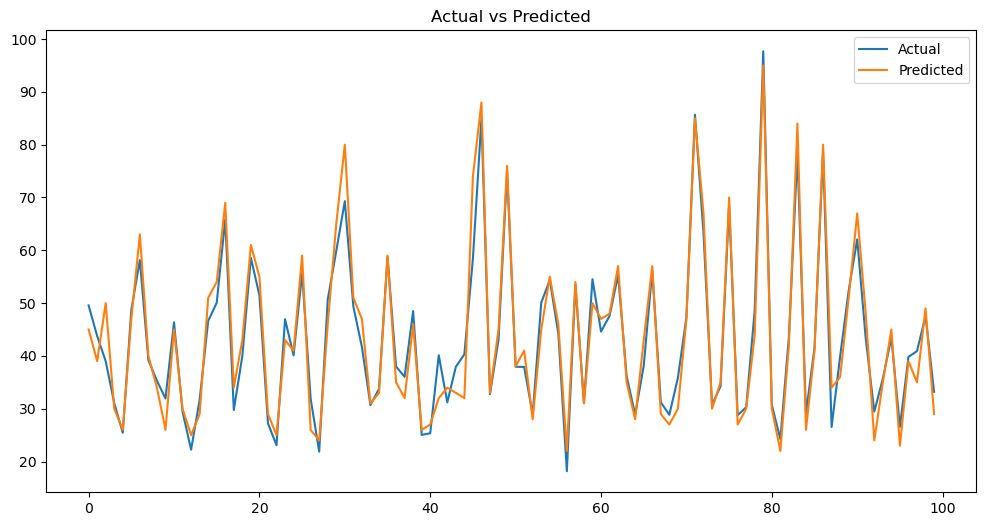

In [27]:
lr = LinearRegression()
lr.fit(x_train,y_train) 
y_predict = lr.predict(x_test)

mae.append(mean_absolute_error(y_test, y_predict))
rmse.append(np.sqrt(mean_squared_error(y_test,y_predict)))
r2.append(r2_score(y_test,y_predict))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

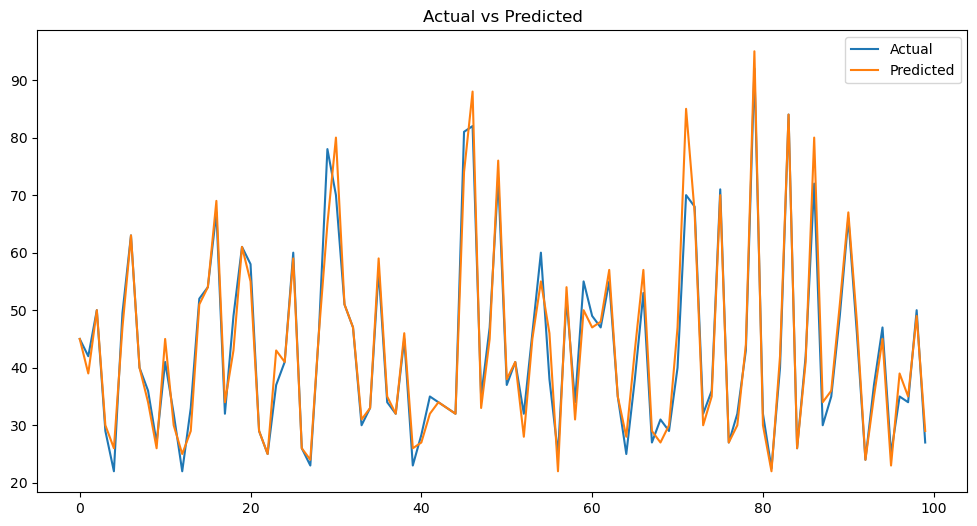

In [28]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(criterion='squared_error', splitter='best')
dt.fit(x_train, y_train)
y_predict_dt = dt.predict(x_test)

mae.append(mean_absolute_error(y_test, y_predict_dt))
rmse.append(np.sqrt(mean_squared_error(y_test, y_predict_dt)))
r2.append(r2_score(y_test, y_predict_dt))

fig = plt.figure(figsize=(12, 6))
result = pd.DataFrame({'Predicted': y_predict_dt, 'Actual': y_test})
result = result.reset_index()
result = result.drop(['index'], axis=1)
plt.plot(result[:100])
plt.legend(['Actual', 'Predicted'])
plt.title('Actual vs Predicted')
plt.show()


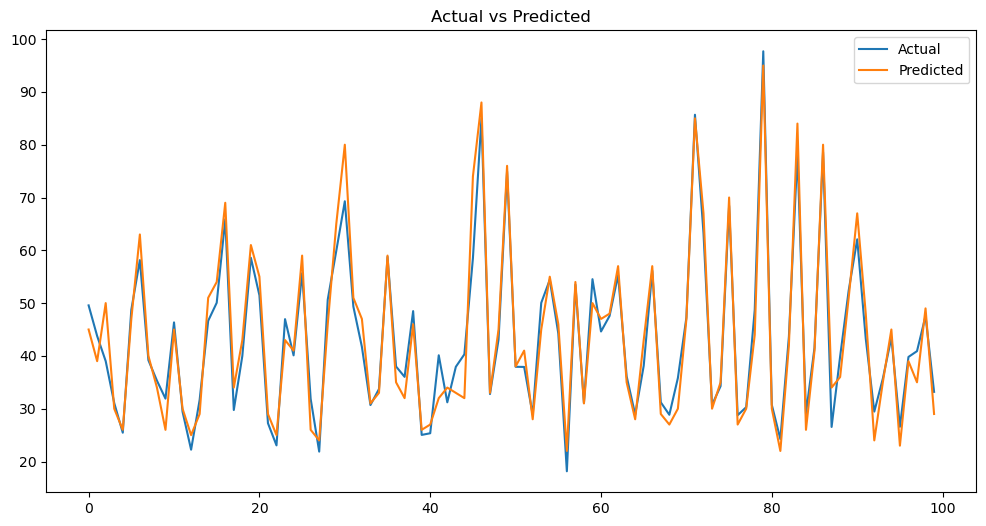

In [29]:
lasso = Lasso(alpha=0.001)
lasso.fit(x_train,y_train)
y_predict_lasso = lasso.predict(x_test) 

mae.append(mean_absolute_error(y_test, y_predict_lasso))
rmse.append(np.sqrt(mean_squared_error(y_test,y_predict_lasso)))
r2.append(r2_score(y_test,y_predict_lasso))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_lasso,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

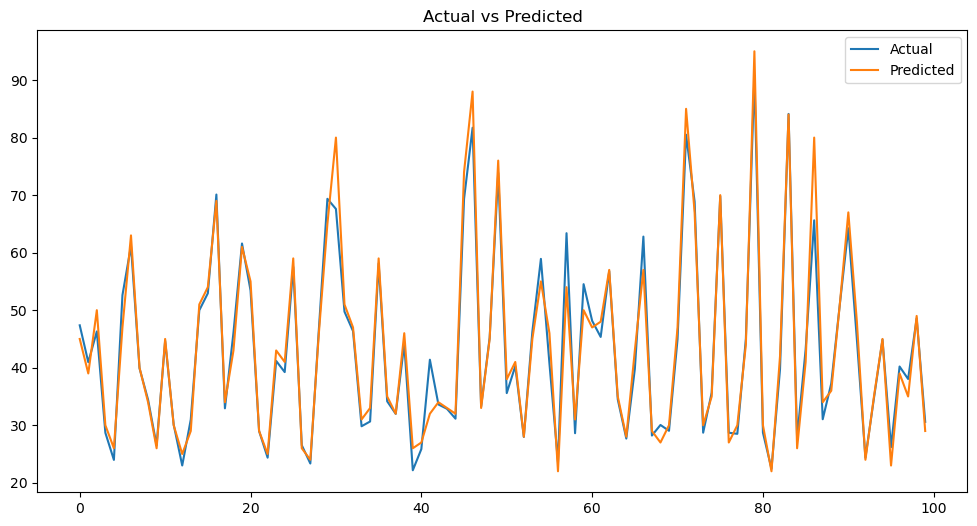

In [30]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_predict_rf = rf.predict(x_test)

mae.append(mean_absolute_error(y_test, y_predict_rf))
rmse.append(np.sqrt(mean_squared_error(y_test,y_predict_rf)))
r2.append(r2_score(y_test,y_predict_rf))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_rf,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

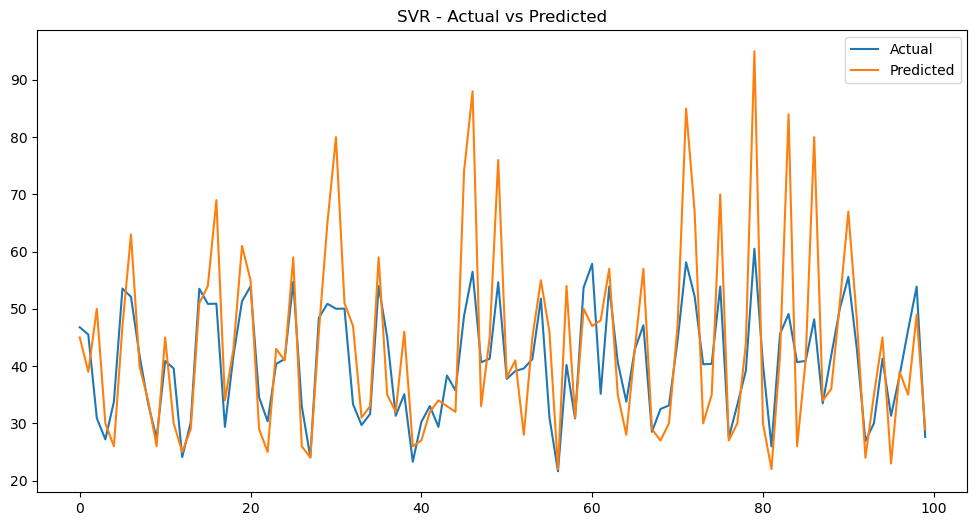

In [31]:
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

svr = SVR()
svr.fit(x_train, y_train)
y_predict_svr = svr.predict(x_test)

mae.append(mean_absolute_error(y_test, y_predict_svr))
rmse.append(np.sqrt(mean_squared_error(y_test, y_predict_svr)))
r2.append(r2_score(y_test, y_predict_svr))

fig = plt.figure(figsize=(12, 6))
result_svr = pd.DataFrame({'Predicted': y_predict_svr, 'Actual': y_test})
result_svr = result_svr.reset_index()
result_svr = result_svr.drop(['index'], axis=1)
plt.plot(result_svr[:100])
plt.legend(['Actual', 'Predicted'])
plt.title('SVR - Actual vs Predicted')
plt.show()

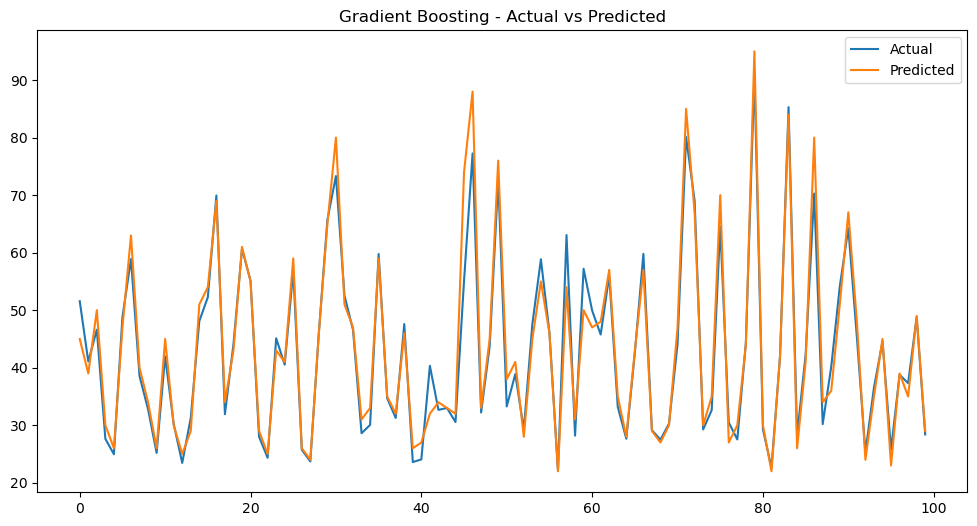

In [32]:
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)
y_predict_gb = gb.predict(x_test)

mae.append(mean_absolute_error(y_test, y_predict_gb))
rmse.append(np.sqrt(mean_squared_error(y_test, y_predict_gb)))
r2.append(r2_score(y_test, y_predict_gb))

fig = plt.figure(figsize=(12, 6))
result_gb = pd.DataFrame({'Predicted': y_predict_gb, 'Actual': y_test})
result_gb = result_gb.reset_index()
result_gb = result_gb.drop(['index'], axis=1)
plt.plot(result_gb[:100])
plt.legend(['Actual', 'Predicted'])
plt.title('Gradient Boosting - Actual vs Predicted')
plt.show()

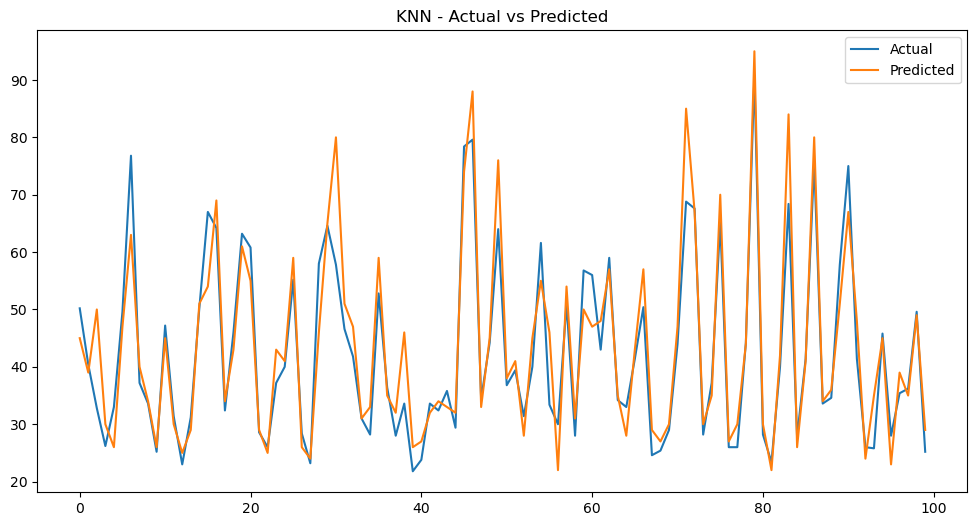

In [33]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
y_predict_knn = knn.predict(x_test)

mae.append(mean_absolute_error(y_test, y_predict_knn))
rmse.append(np.sqrt(mean_squared_error(y_test, y_predict_knn)))
r2.append(r2_score(y_test, y_predict_knn))

fig = plt.figure(figsize=(12, 6))
result_knn = pd.DataFrame({'Predicted': y_predict_knn, 'Actual': y_test})
result_knn = result_knn.reset_index()
result_knn = result_knn.drop(['index'], axis=1)
plt.plot(result_knn[:100])
plt.legend(['Actual', 'Predicted'])
plt.title('KNN - Actual vs Predicted')
plt.show()

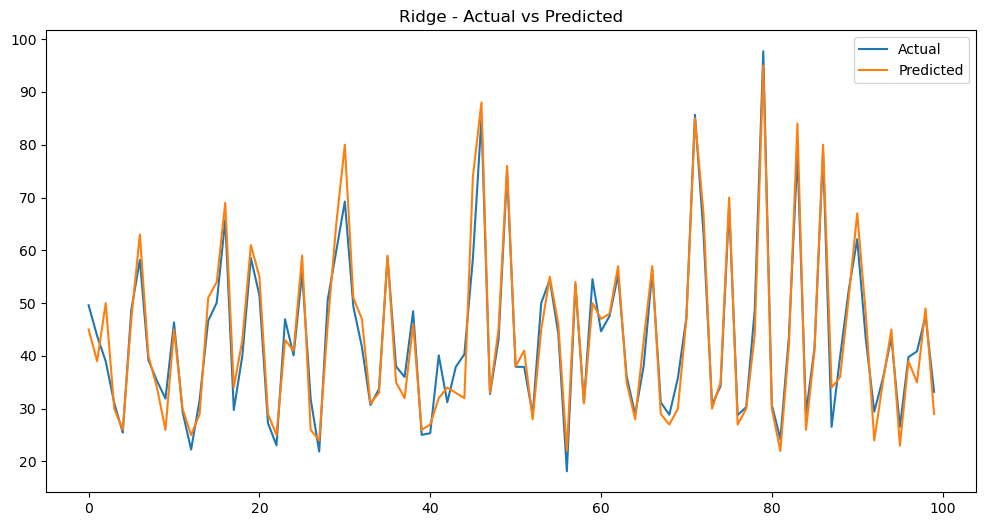

In [34]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(x_train, y_train)
y_predict_ridge = ridge.predict(x_test)

mae.append(mean_absolute_error(y_test, y_predict_ridge))
rmse.append(np.sqrt(mean_squared_error(y_test, y_predict_ridge)))
r2.append(r2_score(y_test, y_predict_ridge))

fig = plt.figure(figsize=(12, 6))
result_rid = pd.DataFrame({'Predicted': y_predict_ridge, 'Actual': y_test})
result_rid = result_rid.reset_index()
result_rid = result_rid.drop(['index'], axis=1)
plt.plot(result_rid[:100])
plt.legend(['Actual', 'Predicted'])
plt.title('Ridge - Actual vs Predicted')
plt.show()

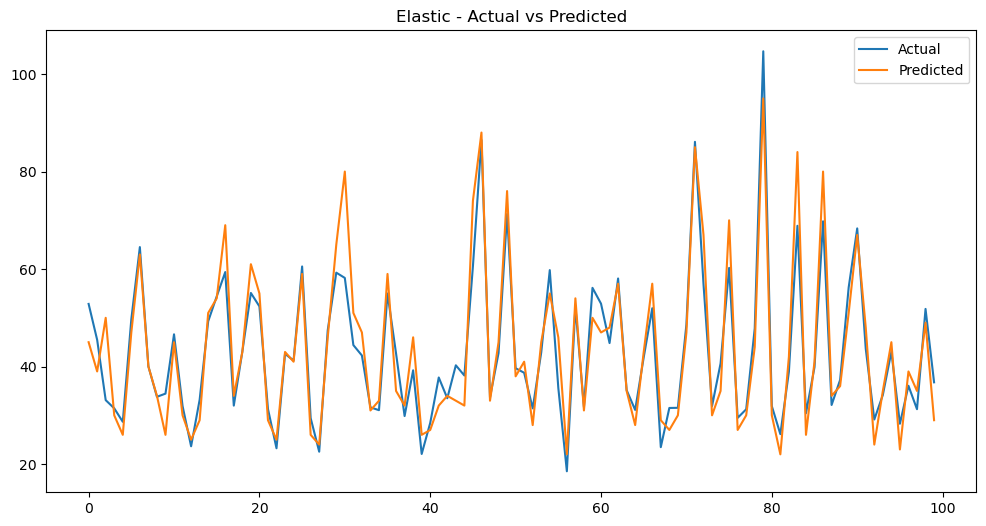

In [35]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet()
elastic_net.fit(x_train, y_train)
y_predict_elastic_net = elastic_net.predict(x_test)

mae.append(mean_absolute_error(y_test, y_predict_elastic_net))
rmse.append(np.sqrt(mean_squared_error(y_test, y_predict_elastic_net)))
r2.append(r2_score(y_test, y_predict_elastic_net))

fig = plt.figure(figsize=(12, 6))
result_elastic = pd.DataFrame({'Predicted': y_predict_elastic_net, 'Actual': y_test})
result_elastic = result_elastic.reset_index()
result_elastic = result_elastic.drop(['index'], axis=1)
plt.plot(result_elastic[:100])
plt.legend(['Actual', 'Predicted'])
plt.title('Elastic - Actual vs Predicted')
plt.show()

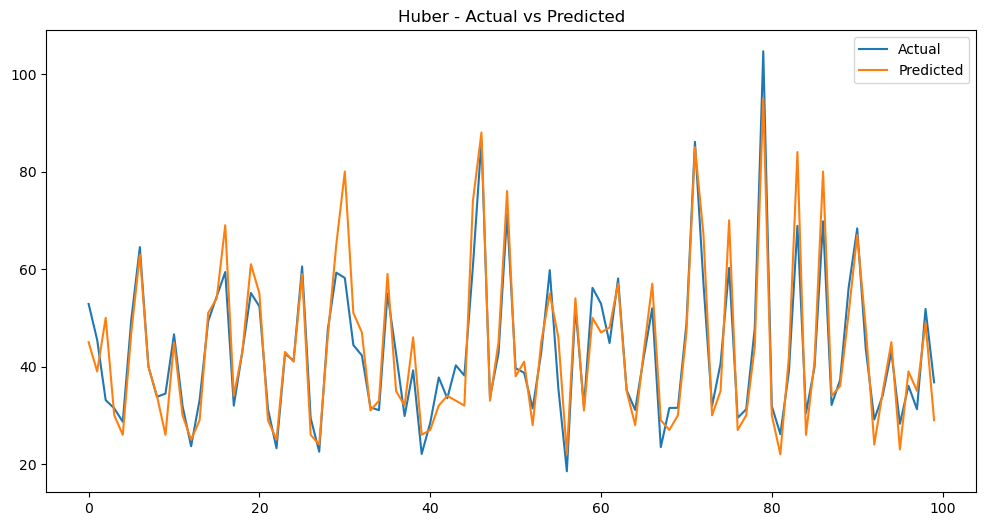

In [36]:
from sklearn.linear_model import HuberRegressor

# Huber Regressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

huber = HuberRegressor(max_iter=1600)
huber.fit(x_train_scaled, y_train)
y_predict_huber = huber.predict(x_test_scaled)

mae.append(mean_absolute_error(y_test, y_predict_huber))
rmse.append(np.sqrt(mean_squared_error(y_test, y_predict_huber)))
r2.append(r2_score(y_test, y_predict_huber))

fig = plt.figure(figsize=(12, 6))
result_huber = pd.DataFrame({'Predicted': y_predict_huber, 'Actual': y_test})
result_huber = result_huber.reset_index()
result_huber = result_huber.drop(['index'], axis=1)
plt.plot(result_elastic[:100])
plt.legend(['Actual', 'Predicted'])
plt.title('Huber - Actual vs Predicted')
plt.show()

In [37]:
final_RMSE = pd.DataFrame( data  = [mae,rmse,r2],
                          columns = ['Linear Regression', 'Lasso', 'Decision Tree Regressor', 'Random Forest Regressor', 'SVR', 'Gradient Boosting Regressor', 'KNN', 'Ridge', 'ElasticNet','Huber Regressor'],
                         index =['MAE','RMSE','R2'])


final_RMSE = final_RMSE.T

cm = sns.light_palette('green', as_cmap=True)

final_RMSE = final_RMSE.style.background_gradient(cmap=cm)
final_RMSE

,MAE,RMSE,R2
Linear Regression,3.278623,4.239878,0.942247
Lasso,2.593468,3.843455,0.952542
Decision Tree Regressor,3.277960,4.239181,0.942266
Random Forest Regressor,2.060727,2.918564,0.972634
SVR,7.531174,11.457088,0.578287
Gradient Boosting Regressor,2.330272,3.224126,0.966604
KNN,4.068919,5.903160,0.888046
Ridge,3.278347,4.241115,0.942213
ElasticNet,4.250800,6.037654,0.882887
Huber Regressor,3.291884,4.434769,0.936815


In [38]:
#en iyi algoritma Random Forest oldu Grid Search ile bu değerleri arttırmaya çalıştım

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Absolute Error: 1.948378023112398
Root Mean Squared Error: 2.7963045279454524
Coefficient of Determination R^2: 0.9748789418035311


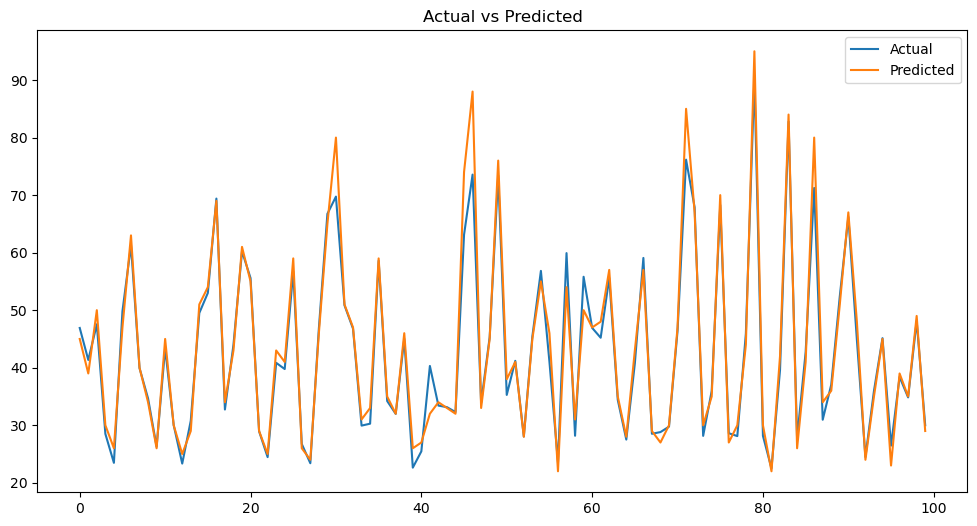

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

rf = RandomForestRegressor()

# Grid Search için arama alanı belirttim
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Grid Search'i eğittim
grid_search.fit(x_train, y_train)

# En iyi parametreleri ve modeli aldım
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_predict_rf = best_model.predict(x_test)

mae = mean_absolute_error(y_test, y_predict_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_predict_rf))
r2 = r2_score(y_test, y_predict_rf)

# Hata metriklerini ve en iyi parametreleri görüntüledim
print('Best Parameters:', best_params)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)
print('Coefficient of Determination R^2:', r2)

fig = plt.figure(figsize=(12, 6))
result = pd.DataFrame({'Predicted': y_predict_rf, 'Actual': y_test})
result = result.reset_index()
result = result.drop(['index'], axis=1)
plt.plot(result[:100])
plt.legend(['Actual', 'Predicted'])
plt.title('Actual vs Predicted')
plt.show()


In [41]:
df

,Puan,Depolama,RAM,Ekran Boyutu,Batarya Kapasitesi,Kamera Piksel,Ekran/Gövde Oranı,CPU Frekans,Genislik,Uzunluk,5G,Suya Dayaniklilik,Hizli Şarj
0,100,1024,8.0,6.70,4422,48.0,89.10,3.64,1290,2796.0,0,0,0
1,99,1024,12.0,6.80,5000,200.0,89.41,3.36,1440,3088.0,0,0,0
2,97,1024,8.0,6.10,3274,48.0,87.35,3.64,1179,2556.0,0,0,0
3,97,512,12.0,6.73,4820,50.0,89.74,3.20,1440,3200.0,0,0,0
4,95,1024,6.0,6.70,4323,48.0,87.63,3.46,1290,2796.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1473,21,16,2.0,5.00,2400,13.0,68.46,1.40,720,1280.0,1,1,1
1474,21,16,2.0,5.00,2600,13.0,69.44,1.40,720,1280.0,1,1,1
1475,21,8,1.5,5.20,2300,8.0,71.95,1.50,1080,1920.0,1,1,1
1476,21,8,1.0,5.70,3000,13.0,69.60,1.20,720,1280.0,1,1,1


In [42]:
import joblib
joblib.dump(best_model,"best_model.sav")

['best_model.sav']